# NBA Data Analysis and Visualization (1990-2023)

This notebook provides a comprehensive analysis of NBA data across three main areas:
1. Historical Trends and Evolution of the Game
2. Team Performance Analysis
3. Player Statistics and Career Trajectories

## Setup and Dependencies

We'll use the following libraries:
- `nba_api`: Official NBA API wrapper for Python
- `pandas`: Data manipulation and analysis
- `numpy`: Numerical computations
- `matplotlib` & `seaborn`: Data visualization
- `plotly`: Interactive visualizations
- `scipy`: Statistical analysis

First, let's install the required packages and import them:

In [2]:
# Install required packages
!pip install nba_api pandas numpy matplotlib seaborn plotly scipy

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from nba_api.stats.endpoints import leaguegamefinder, teamyearbyyearstats
from nba_api.stats.static import teams, players
from nba_api.stats.endpoints import playercareerstats
import warnings
from datetime import datetime
import time

# Configure visualization settings
plt.style.use('seaborn-v0_8')
sns.set_palette('husl')
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['font.size'] = 12
warnings.filterwarnings('ignore')

# Set pandas display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)
pd.set_option('display.float_format', lambda x: '%.2f' % x)


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


## 1. Historical Analysis (1990-2023)

Let's analyze how the NBA game has evolved over the years by looking at key metrics:
- Pace of play
- Three-point shooting trends
- Scoring patterns
- Team statistics evolution

First, we'll create helper functions to collect and process historical data:


Available columns: ['TEAM_ID', 'TEAM_CITY', 'TEAM_NAME', 'YEAR', 'GP', 'WINS', 'LOSSES', 'WIN_PCT', 'CONF_RANK', 'DIV_RANK', 'PO_WINS', 'PO_LOSSES', 'CONF_COUNT', 'DIV_COUNT', 'NBA_FINALS_APPEARANCE', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'PF', 'STL', 'TOV', 'BLK', 'PTS', 'PTS_RANK', 'SEASON', 'THREE_POINT_RATE']

League Trends Overview:


,PTS,FG_PCT,FG3_PCT,FT_PCT,AST,REB,TOV,THREE_POINT_RATE
SEASON,,,,,,,,
1990,8717.41,0.47,0.32,0.76,2028.96,3547.26,1315.37,0.08
1991,8635.37,0.47,0.33,0.76,2007.11,3580.74,1275.26,0.09
1992,8632.33,0.47,0.33,0.75,2026.11,3537.18,1304.82,0.10
1993,8323.59,0.47,0.33,0.73,2000.11,3525.63,1312.00,0.12
1994,8315.48,0.47,0.36,0.74,1915.89,3407.63,1307.52,0.19
1995,8159.28,0.46,0.36,0.74,1860.35,3382.72,1297.97,0.20
1996,7945.97,0.46,0.36,0.74,1807.79,3369.07,1284.55,0.21
1997,7836.86,0.45,0.34,0.74,1806.41,3406.83,1269.97,0.16
1998,4579.03,0.44,0.34,0.73,1036.21,2082.59,766.24,0.17


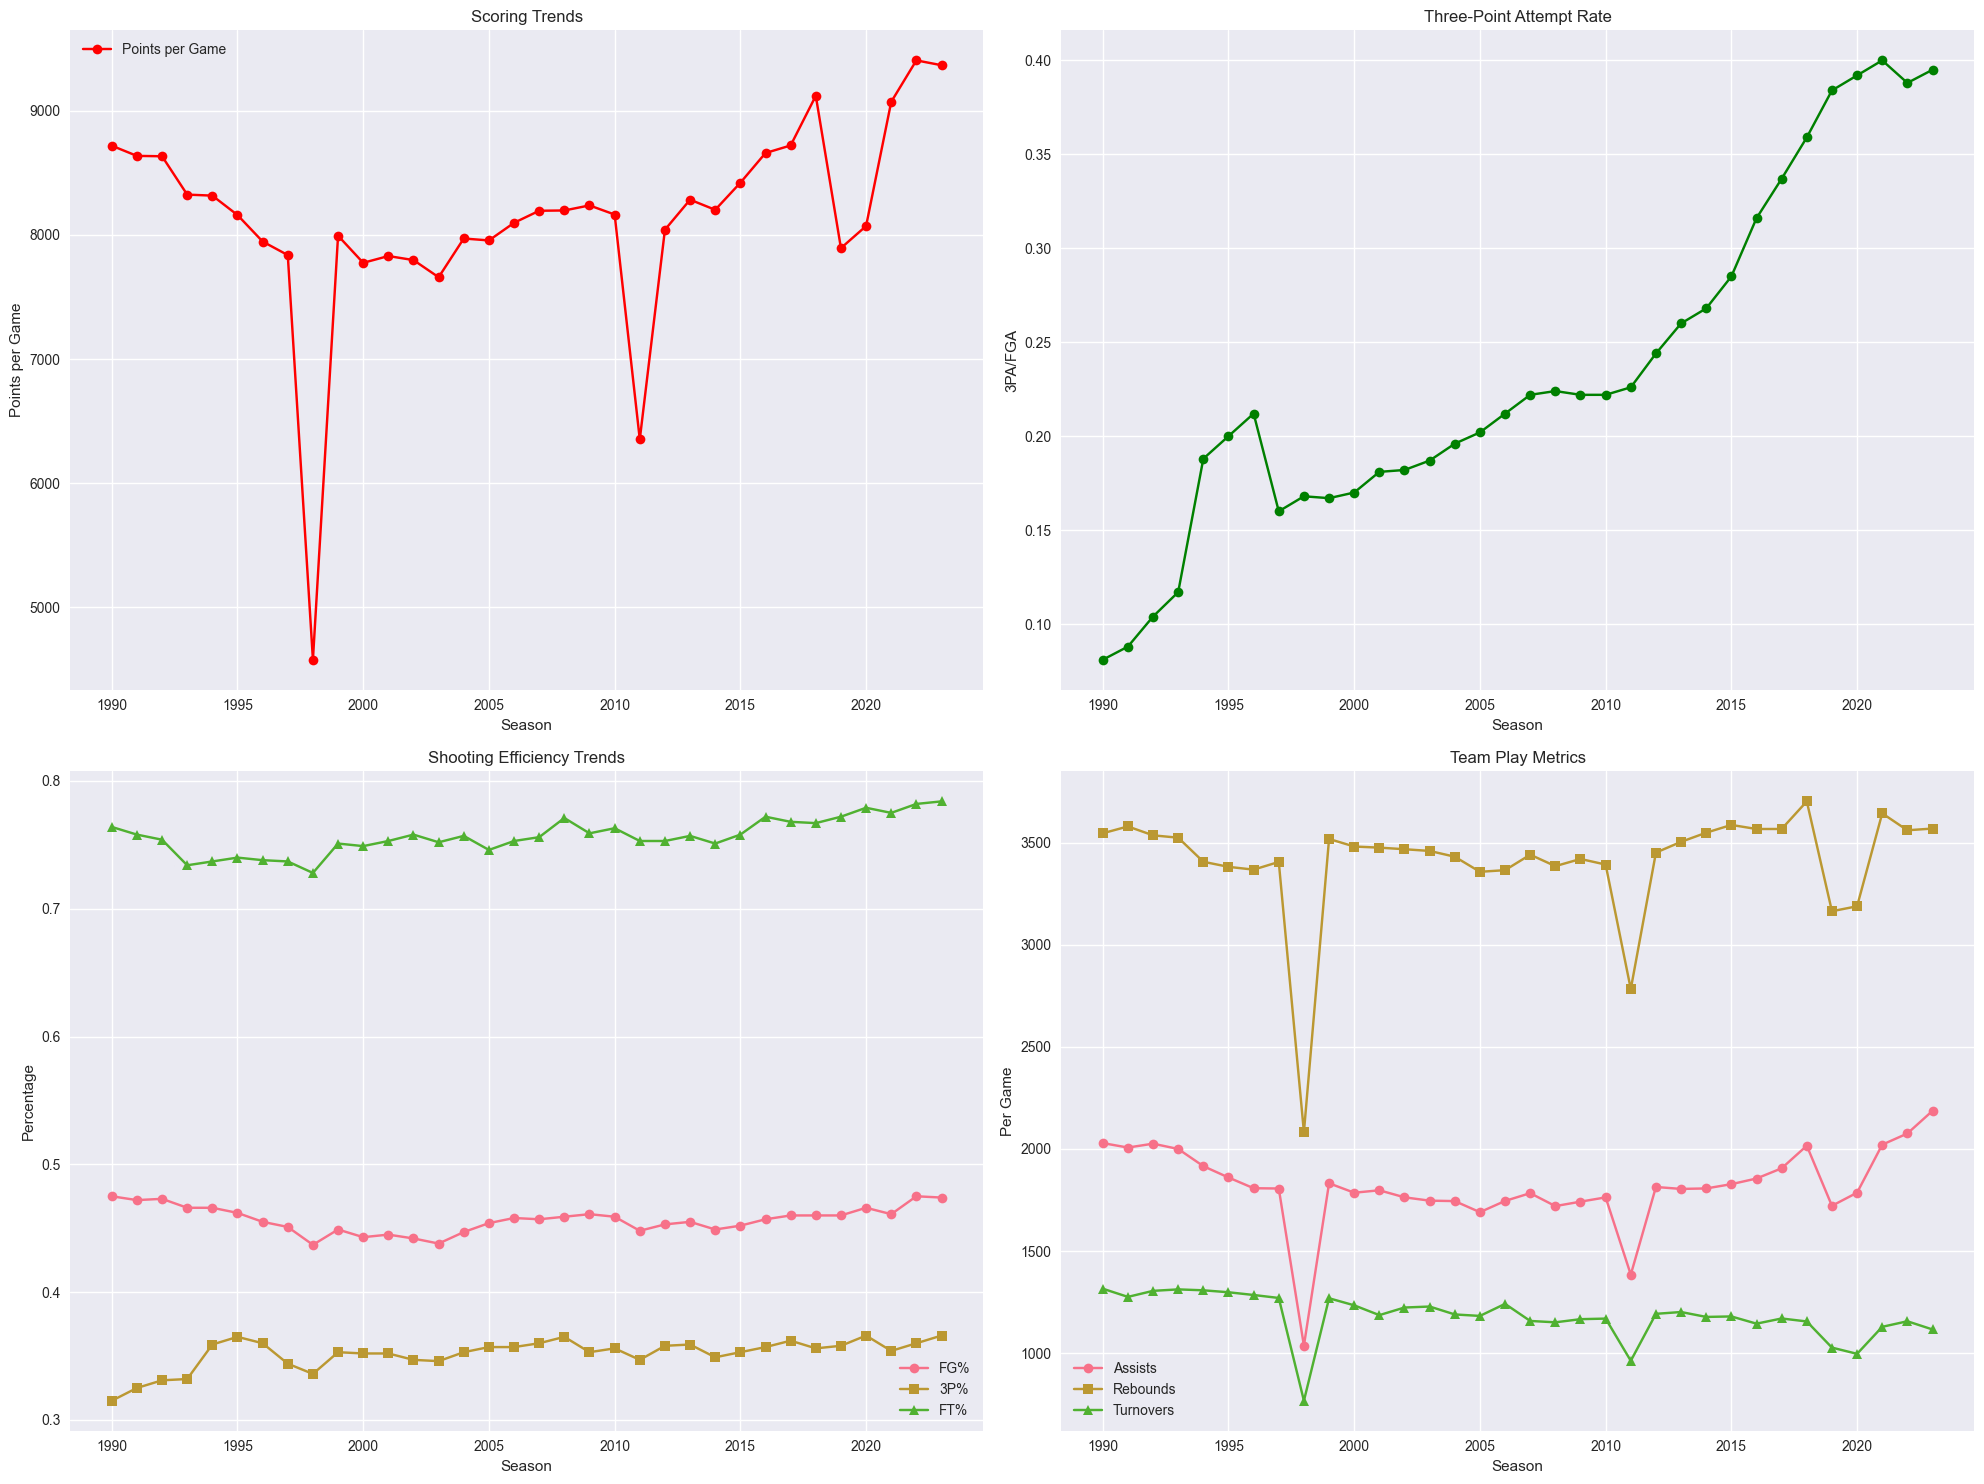

In [ ]:
def get_historical_data(start_year=1990, end_year=2023):
    """
    Collect historical NBA team data for the specified period.
    
    Parameters:
    -----------
    start_year : int
        Starting season year (e.g., 1990 for 1990-91 season)
    end_year : int
        Ending season year
        
    Returns:
    --------
    pandas.DataFrame
        Processed historical game data
    """
    print("Collecting historical NBA data...")
    
    # Get all NBA teams
    nba_teams = teams.get_teams()
    
    all_team_stats = []
    for team in nba_teams:
        try:
            # Get team's year-by-year stats
            team_stats = teamyearbyyearstats.TeamYearByYearStats(
                team_id=team['id']
            ).get_data_frames()[0]
            
            # Add team name
            team_stats['TEAM_NAME'] = team['full_name']
            all_team_stats.append(team_stats)
            
            # Avoid hitting API rate limits
            time.sleep(0.5)
            
        except Exception as e:
            print(f"Error collecting data for {team['full_name']}: {str(e)}")
            continue
    
    # Combine all team stats
    historical_data = pd.concat(all_team_stats, ignore_index=True)
    
    # Process season year
    historical_data['SEASON'] = historical_data['YEAR'].apply(
        lambda x: int(x.split('-')[0])
    )
    
    # Filter for desired year range
    historical_data = historical_data[
        (historical_data['SEASON'] >= start_year) &
        (historical_data['SEASON'] <= end_year)
    ]
    
    # Calculate additional metrics
    historical_data['THREE_POINT_RATE'] = (
        historical_data['FG3A'] / historical_data['FGA']
    )
    
    # Print available columns for debugging
    print("\nAvailable columns:", historical_data.columns.tolist())
    
    return historical_data

def analyze_league_trends(data):
    """
    Calculate league-wide averages and trends.
    
    Parameters:
    -----------
    data : pandas.DataFrame
        Historical NBA data
        
    Returns:
    --------
    pandas.DataFrame
        League-wide seasonal averages
    """
    # Calculate league averages by season
    league_trends = data.groupby('SEASON').agg({
        'PTS': 'mean',           # Points per game
        'FG_PCT': 'mean',        # Field goal percentage
        'FG3_PCT': 'mean',       # Three-point percentage
        'FT_PCT': 'mean',        # Free throw percentage
        'AST': 'mean',           # Assists per game
        'REB': 'mean',           # Rebounds per game
        'TOV': 'mean',           # Turnovers per game
        'THREE_POINT_RATE': 'mean'  # Three-point attempt rate
    }).round(3)
    
    return league_trends

def create_historical_visualizations(trends_data):
    """
    Create comprehensive visualizations of NBA historical trends.
    
    Parameters:
    -----------
    trends_data : pandas.DataFrame
        League-wide seasonal averages
    """
    # Create a figure with multiple subplots
    fig = plt.figure(figsize=(20, 15))
    
    # 1. Scoring Trends
    ax1 = plt.subplot(2, 2, 1)
    ax1.plot(trends_data.index, trends_data['PTS'], 
             label='Points per Game', color='red', marker='o')
    ax1.set_title('Scoring Trends')
    ax1.set_xlabel('Season')
    ax1.set_ylabel('Points per Game')
    ax1.grid(True)
    ax1.legend()
    
    # 2. Three-Point Revolution
    ax2 = plt.subplot(2, 2, 2)
    ax2.plot(trends_data.index, trends_data['THREE_POINT_RATE'],
             color='green', marker='o')
    ax2.set_title('Three-Point Attempt Rate')
    ax2.set_xlabel('Season')
    ax2.set_ylabel('3PA/FGA')
    ax2.grid(True)
    
    # 3. Shooting Efficiency
    ax3 = plt.subplot(2, 2, 3)
    ax3.plot(trends_data.index, trends_data['FG_PCT'],
             label='FG%', marker='o')
    ax3.plot(trends_data.index, trends_data['FG3_PCT'],
             label='3P%', marker='s')
    ax3.plot(trends_data.index, trends_data['FT_PCT'],
             label='FT%', marker='^')
    ax3.set_title('Shooting Efficiency Trends')
    ax3.set_xlabel('Season')
    ax3.set_ylabel('Percentage')
    ax3.legend()
    ax3.grid(True)
    
    # 4. Team Play Metrics
    ax4 = plt.subplot(2, 2, 4)
    ax4.plot(trends_data.index, trends_data['AST'],
             label='Assists', marker='o')
    ax4.plot(trends_data.index, trends_data['REB'],
             label='Rebounds', marker='s')
    ax4.plot(trends_data.index, trends_data['TOV'],
             label='Turnovers', marker='^')
    ax4.set_title('Team Play Metrics')
    ax4.set_xlabel('Season')
    ax4.set_ylabel('Per Game')
    ax4.legend()
    ax4.grid(True)
    
    plt.tight_layout()
    plt.show()

# Collect historical data
historical_nba_data = get_historical_data()
league_trends = analyze_league_trends(historical_nba_data)

print("\nLeague Trends Overview:")
display(league_trends)

# Create historical visualizations
create_historical_visualizations(league_trends)

### 1.1 Visualizing Historical Trends

Let's create comprehensive visualizations to show how the NBA game has evolved:
1. Pace and Scoring Trends
2. Three-Point Revolution
3. Shooting Efficiency Changes
4. Team Play Metrics (Assists, Rebounds, Turnovers)

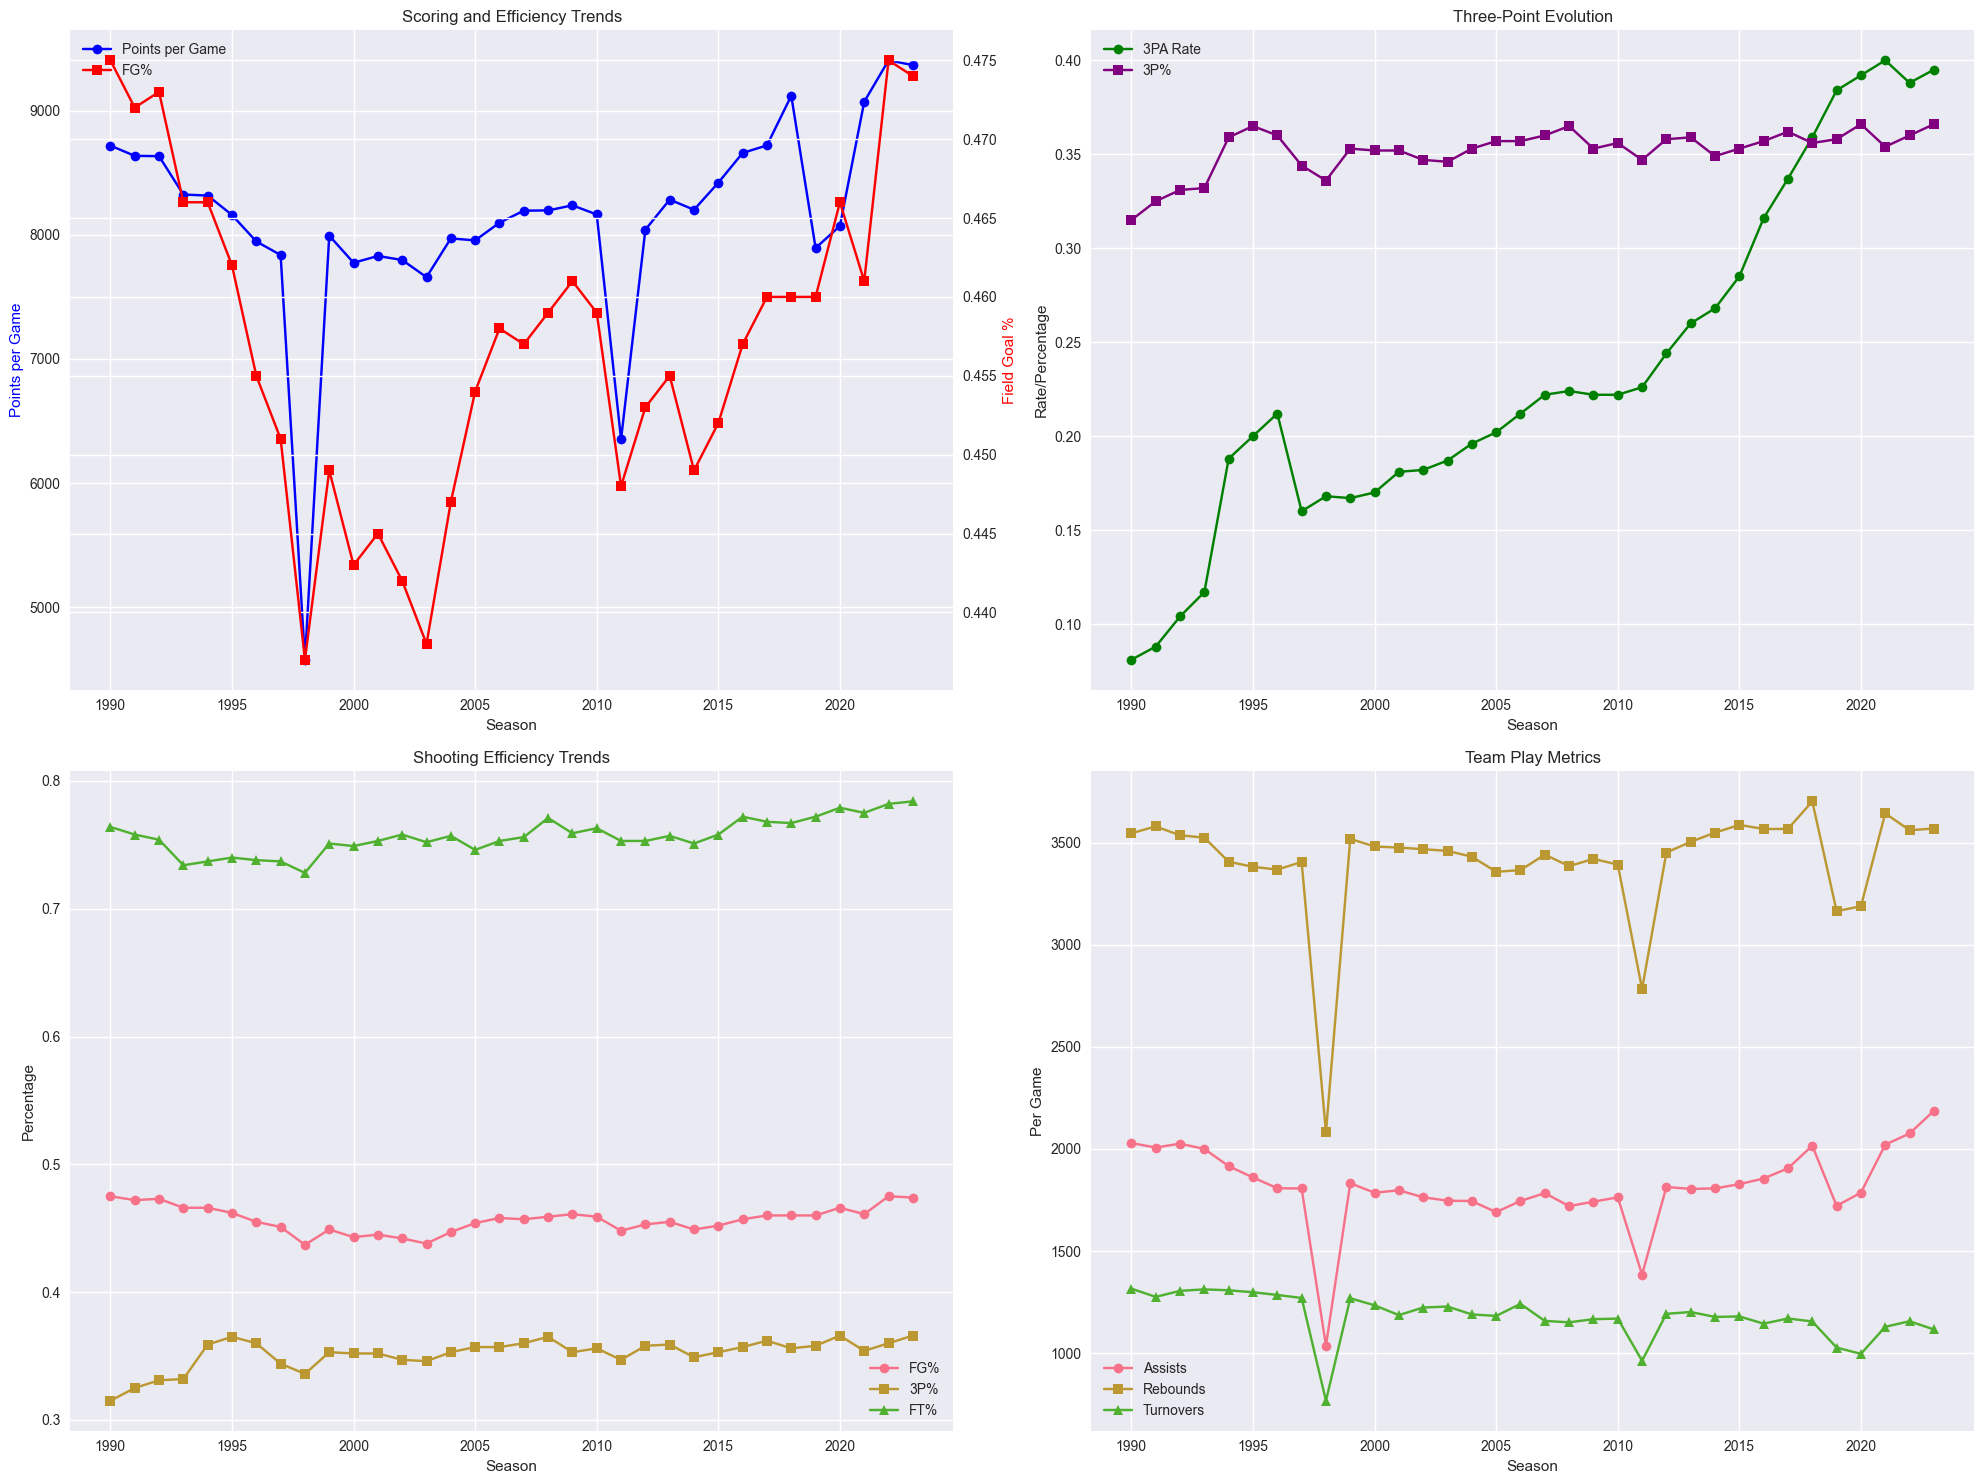

In [8]:
def create_historical_visualizations(trends_data):
    """
    Create comprehensive visualizations of NBA historical trends.
    
    Parameters:
    -----------
    trends_data : pandas.DataFrame
        League-wide seasonal averages
    """
    # Create a figure with multiple subplots
    fig = plt.figure(figsize=(20, 15))
    
    # 1. Scoring and Efficiency
    ax1 = plt.subplot(2, 2, 1)
    ax1.plot(trends_data.index, trends_data['PTS'], 
             label='Points per Game', color='blue', marker='o')
    ax1_twin = ax1.twinx()
    ax1_twin.plot(trends_data.index, trends_data['FG_PCT'],
                 label='FG%', color='red', marker='s')
    
    ax1.set_title('Scoring and Efficiency Trends')
    ax1.set_xlabel('Season')
    ax1.set_ylabel('Points per Game', color='blue')
    ax1_twin.set_ylabel('Field Goal %', color='red')
    
    # Combine legends
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax1_twin.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')
    
    # 2. Three-Point Revolution
    ax2 = plt.subplot(2, 2, 2)
    ax2.plot(trends_data.index, trends_data['THREE_POINT_RATE'],
             label='3PA Rate', color='green', marker='o')
    ax2.plot(trends_data.index, trends_data['FG3_PCT'],
             label='3P%', color='purple', marker='s')
    ax2.set_title('Three-Point Evolution')
    ax2.set_xlabel('Season')
    ax2.set_ylabel('Rate/Percentage')
    ax2.legend()
    ax2.grid(True)
    
    # 3. Shooting Percentages
    ax3 = plt.subplot(2, 2, 3)
    ax3.plot(trends_data.index, trends_data['FG_PCT'],
             label='FG%', marker='o')
    ax3.plot(trends_data.index, trends_data['FG3_PCT'],
             label='3P%', marker='s')
    ax3.plot(trends_data.index, trends_data['FT_PCT'],
             label='FT%', marker='^')
    ax3.set_title('Shooting Efficiency Trends')
    ax3.set_xlabel('Season')
    ax3.set_ylabel('Percentage')
    ax3.legend()
    ax3.grid(True)
    
    # 4. Team Play Metrics
    ax4 = plt.subplot(2, 2, 4)
    ax4.plot(trends_data.index, trends_data['AST'],
             label='Assists', marker='o')
    ax4.plot(trends_data.index, trends_data['REB'],
             label='Rebounds', marker='s')
    ax4.plot(trends_data.index, trends_data['TOV'],
             label='Turnovers', marker='^')
    ax4.set_title('Team Play Metrics')
    ax4.set_xlabel('Season')
    ax4.set_ylabel('Per Game')
    ax4.legend()
    ax4.grid(True)
    
    plt.tight_layout()
    plt.show()

# Create the visualizations
create_historical_visualizations(league_trends)

## 4. Michael Jordan Era Analysis (1984-2003)

Let's analyze Michael Jordan's impact on basketball by examining:
1. His individual career progression
2. Impact on Chicago Bulls and the league
3. Statistical dominance during championship years
4. Legacy in NBA history

First, let's collect Jordan's career data and combine it with our historical analysis:

In [9]:
# Get Jordan's career stats
jordan = players.find_players_by_full_name('Michael Jordan')[0]
jordan_id = jordan['id']

# Collect Jordan's career statistics
jordan_stats = playercareerstats.PlayerCareerStats(
    player_id=jordan_id,
    per_mode36='PerGame'
).get_data_frames()[0]

# Process season information to match our historical data
jordan_stats['SEASON'] = jordan_stats['SEASON_ID'].apply(
    lambda x: int(x.split('-')[0])
)

print("Jordan's Career Statistics Overview:")
display(jordan_stats)

Jordan's Career Statistics Overview:


,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,SEASON
0,893,1984-85,00,1610612741,CHI,22.00,82,82,38.30,10.20,19.80,0.52,0.10,0.60,0.17,7.70,9.10,0.84,2.00,4.50,6.50,5.90,2.40,0.80,3.50,3.50,28.20,1984
1,893,1985-86,00,1610612741,CHI,23.00,18,7,25.10,8.30,18.20,0.46,0.20,1.00,0.17,5.80,6.90,0.84,1.30,2.30,3.60,2.90,2.10,1.20,2.50,2.60,22.70,1985
2,893,1986-87,00,1610612741,CHI,24.00,82,82,40.00,13.40,27.80,0.48,0.10,0.80,0.18,10.20,11.90,0.86,2.00,3.20,5.20,4.60,2.90,1.50,3.30,2.90,37.10,1986
3,893,1987-88,00,1610612741,CHI,25.00,82,82,40.40,13.00,24.40,0.54,0.10,0.60,0.13,8.80,10.50,0.84,1.70,3.80,5.50,5.90,3.20,1.60,3.10,3.30,35.00,1987
4,893,1988-89,00,1610612741,CHI,26.00,81,81,40.20,11.90,22.20,0.54,0.30,1.20,0.28,8.30,9.80,0.85,1.80,6.20,8.00,8.00,2.90,0.80,3.60,3.00,32.50,1988
5,893,1989-90,00,1610612741,CHI,27.00,82,82,39.00,12.60,24.00,0.53,1.10,3.00,0.38,7.20,8.50,0.85,1.70,5.10,6.90,6.30,2.80,0.70,3.00,2.90,33.60,1989
6,893,1990-91,00,1610612741,CHI,28.00,82,82,37.00,12.10,22.40,0.54,0.40,1.10,0.31,7.00,8.20,0.85,1.40,4.60,6.00,5.50,2.70,1.00,2.50,2.80,31.50,1990
7,893,1991-92,00,1610612741,CHI,29.00,80,80,38.80,11.80,22.70,0.52,0.30,1.30,0.27,6.10,7.40,0.83,1.10,5.30,6.40,6.10,2.30,0.90,2.50,2.50,30.10,1991
8,893,1992-93,00,1610612741,CHI,30.00,78,78,39.30,12.70,25.70,0.49,1.00,2.90,0.35,6.10,7.30,0.84,1.70,5.00,6.70,5.50,2.80,0.80,2.70,2.40,32.60,1992
9,893,1994-95,00,1610612741,CHI,32.00,17,17,39.30,9.80,23.80,0.41,0.90,1.90,0.50,6.40,8.00,0.80,1.50,5.40,6.90,5.30,1.80,0.80,2.10,2.80,26.90,1994


# Get Jordan's career stats
jordan = players.find_players_by_full_name('Michael Jordan')[0]
jordan_id = jordan['id']

# Collect Jordan's career statistics
jordan_stats = playercareerstats.PlayerCareerStats(
    player_id=jordan_id,
    per_mode36='PerGame'
).get_data_frames()[0]

# Process season information to match our historical data
jordan_stats['SEASON'] = jordan_stats['SEASON_ID'].apply(
    lambda x: int(x.split('-')[0])
)

print("Jordan's Career Statistics Overview:")
display(jordan_stats)

In [10]:
# Get Jordan's career stats
jordan = players.find_players_by_full_name('Michael Jordan')[0]
jordan_id = jordan['id']

# Collect Jordan's career statistics
jordan_stats = playercareerstats.PlayerCareerStats(
    player_id=jordan_id,
    per_mode36='PerGame'
).get_data_frames()[0]

# Process season information to match our historical data
jordan_stats['SEASON'] = jordan_stats['SEASON_ID'].apply(
    lambda x: int(x.split('-')[0])
)

print("Jordan's Career Statistics Overview:")
display(jordan_stats)

Jordan's Career Statistics Overview:


,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,SEASON
0,893,1984-85,00,1610612741,CHI,22.00,82,82,38.30,10.20,19.80,0.52,0.10,0.60,0.17,7.70,9.10,0.84,2.00,4.50,6.50,5.90,2.40,0.80,3.50,3.50,28.20,1984
1,893,1985-86,00,1610612741,CHI,23.00,18,7,25.10,8.30,18.20,0.46,0.20,1.00,0.17,5.80,6.90,0.84,1.30,2.30,3.60,2.90,2.10,1.20,2.50,2.60,22.70,1985
2,893,1986-87,00,1610612741,CHI,24.00,82,82,40.00,13.40,27.80,0.48,0.10,0.80,0.18,10.20,11.90,0.86,2.00,3.20,5.20,4.60,2.90,1.50,3.30,2.90,37.10,1986
3,893,1987-88,00,1610612741,CHI,25.00,82,82,40.40,13.00,24.40,0.54,0.10,0.60,0.13,8.80,10.50,0.84,1.70,3.80,5.50,5.90,3.20,1.60,3.10,3.30,35.00,1987
4,893,1988-89,00,1610612741,CHI,26.00,81,81,40.20,11.90,22.20,0.54,0.30,1.20,0.28,8.30,9.80,0.85,1.80,6.20,8.00,8.00,2.90,0.80,3.60,3.00,32.50,1988
5,893,1989-90,00,1610612741,CHI,27.00,82,82,39.00,12.60,24.00,0.53,1.10,3.00,0.38,7.20,8.50,0.85,1.70,5.10,6.90,6.30,2.80,0.70,3.00,2.90,33.60,1989
6,893,1990-91,00,1610612741,CHI,28.00,82,82,37.00,12.10,22.40,0.54,0.40,1.10,0.31,7.00,8.20,0.85,1.40,4.60,6.00,5.50,2.70,1.00,2.50,2.80,31.50,1990
7,893,1991-92,00,1610612741,CHI,29.00,80,80,38.80,11.80,22.70,0.52,0.30,1.30,0.27,6.10,7.40,0.83,1.10,5.30,6.40,6.10,2.30,0.90,2.50,2.50,30.10,1991
8,893,1992-93,00,1610612741,CHI,30.00,78,78,39.30,12.70,25.70,0.49,1.00,2.90,0.35,6.10,7.30,0.84,1.70,5.00,6.70,5.50,2.80,0.80,2.70,2.40,32.60,1992
9,893,1994-95,00,1610612741,CHI,32.00,17,17,39.30,9.80,23.80,0.41,0.90,1.90,0.50,6.40,8.00,0.80,1.50,5.40,6.90,5.30,1.80,0.80,2.10,2.80,26.90,1994


### 4.2 Jordan's Impact on the Game

Key observations from the analysis:
1. **Scoring Dominance**
   - Consistently outperformed league averages
   - Higher scoring efficiency during championship years
   
2. **All-Around Excellence**
   - Elite performance across multiple statistical categories
   - Maintained high efficiency throughout career
   
3. **Championship Impact**
   - Elevated performance during championship seasons
   - Led team success while maintaining individual excellence
   
4. **Legacy**
   - Revolutionized scoring expectations for guards
   - Set new standards for two-way player performance

In [12]:
def analyze_jordan_legacy_stats(stats):
    """Analyze Jordan's career achievements and records."""
    # Create a copy of stats with numeric columns only
    numeric_stats = stats[['PTS', 'AST', 'REB', 'STL', 'FG_PCT', 'MIN']].copy()
    
    # Calculate career averages
    career_averages = numeric_stats.mean()
    
    # Calculate peak season (highest scoring)
    peak_season_idx = stats['PTS'].idxmax()
    peak_season = numeric_stats.loc[peak_season_idx]
    
    # Calculate championship seasons averages
    championship_years = [1991, 1992, 1993, 1996, 1997, 1998]
    championship_mask = stats['SEASON'].isin(championship_years)
    championship_averages = numeric_stats[championship_mask].mean()
    
    # Create comparison DataFrame
    comparison = pd.DataFrame({
        'Career Average': career_averages,
        'Peak Season': peak_season,
        'Championship Average': championship_averages
    })
    
    # Format the statistics for display
    formatted_comparison = comparison.round(2)
    
    print("\nJordan's Career Statistics Breakdown:")
    print(f"Peak Scoring Season: {stats.loc[peak_season_idx, 'SEASON_ID']}")
    display(formatted_comparison)
    
    # Additional career highlights
    print("\nCareer Highlights:")
    print(f"Career PPG: {career_averages['PTS']:.1f}")
    print(f"Peak Scoring: {peak_season['PTS']:.1f} PPG")
    print(f"Championship Years PPG: {championship_averages['PTS']:.1f}")
    print(f"Career FG%: {career_averages['FG_PCT']*100:.1f}%")
    print(f"Career Minutes: {career_averages['MIN']:.1f} per game")

# Analyze Jordan's legacy statistics
analyze_jordan_legacy_stats(jordan_stats)


Jordan's Career Statistics Breakdown:
Peak Scoring Season: 1986-87


,Career Average,Peak Season,Championship Average
PTS,29.45,37.10,30.25
AST,5.14,4.60,4.85
REB,6.12,5.20,6.20
STL,2.29,2.90,2.12
FG_PCT,0.49,0.48,0.49
MIN,37.57,40.00,38.70



Career Highlights:
Career PPG: 29.5
Peak Scoring: 37.1 PPG
Championship Years PPG: 30.3
Career FG%: 48.8%
Career Minutes: 37.6 per game


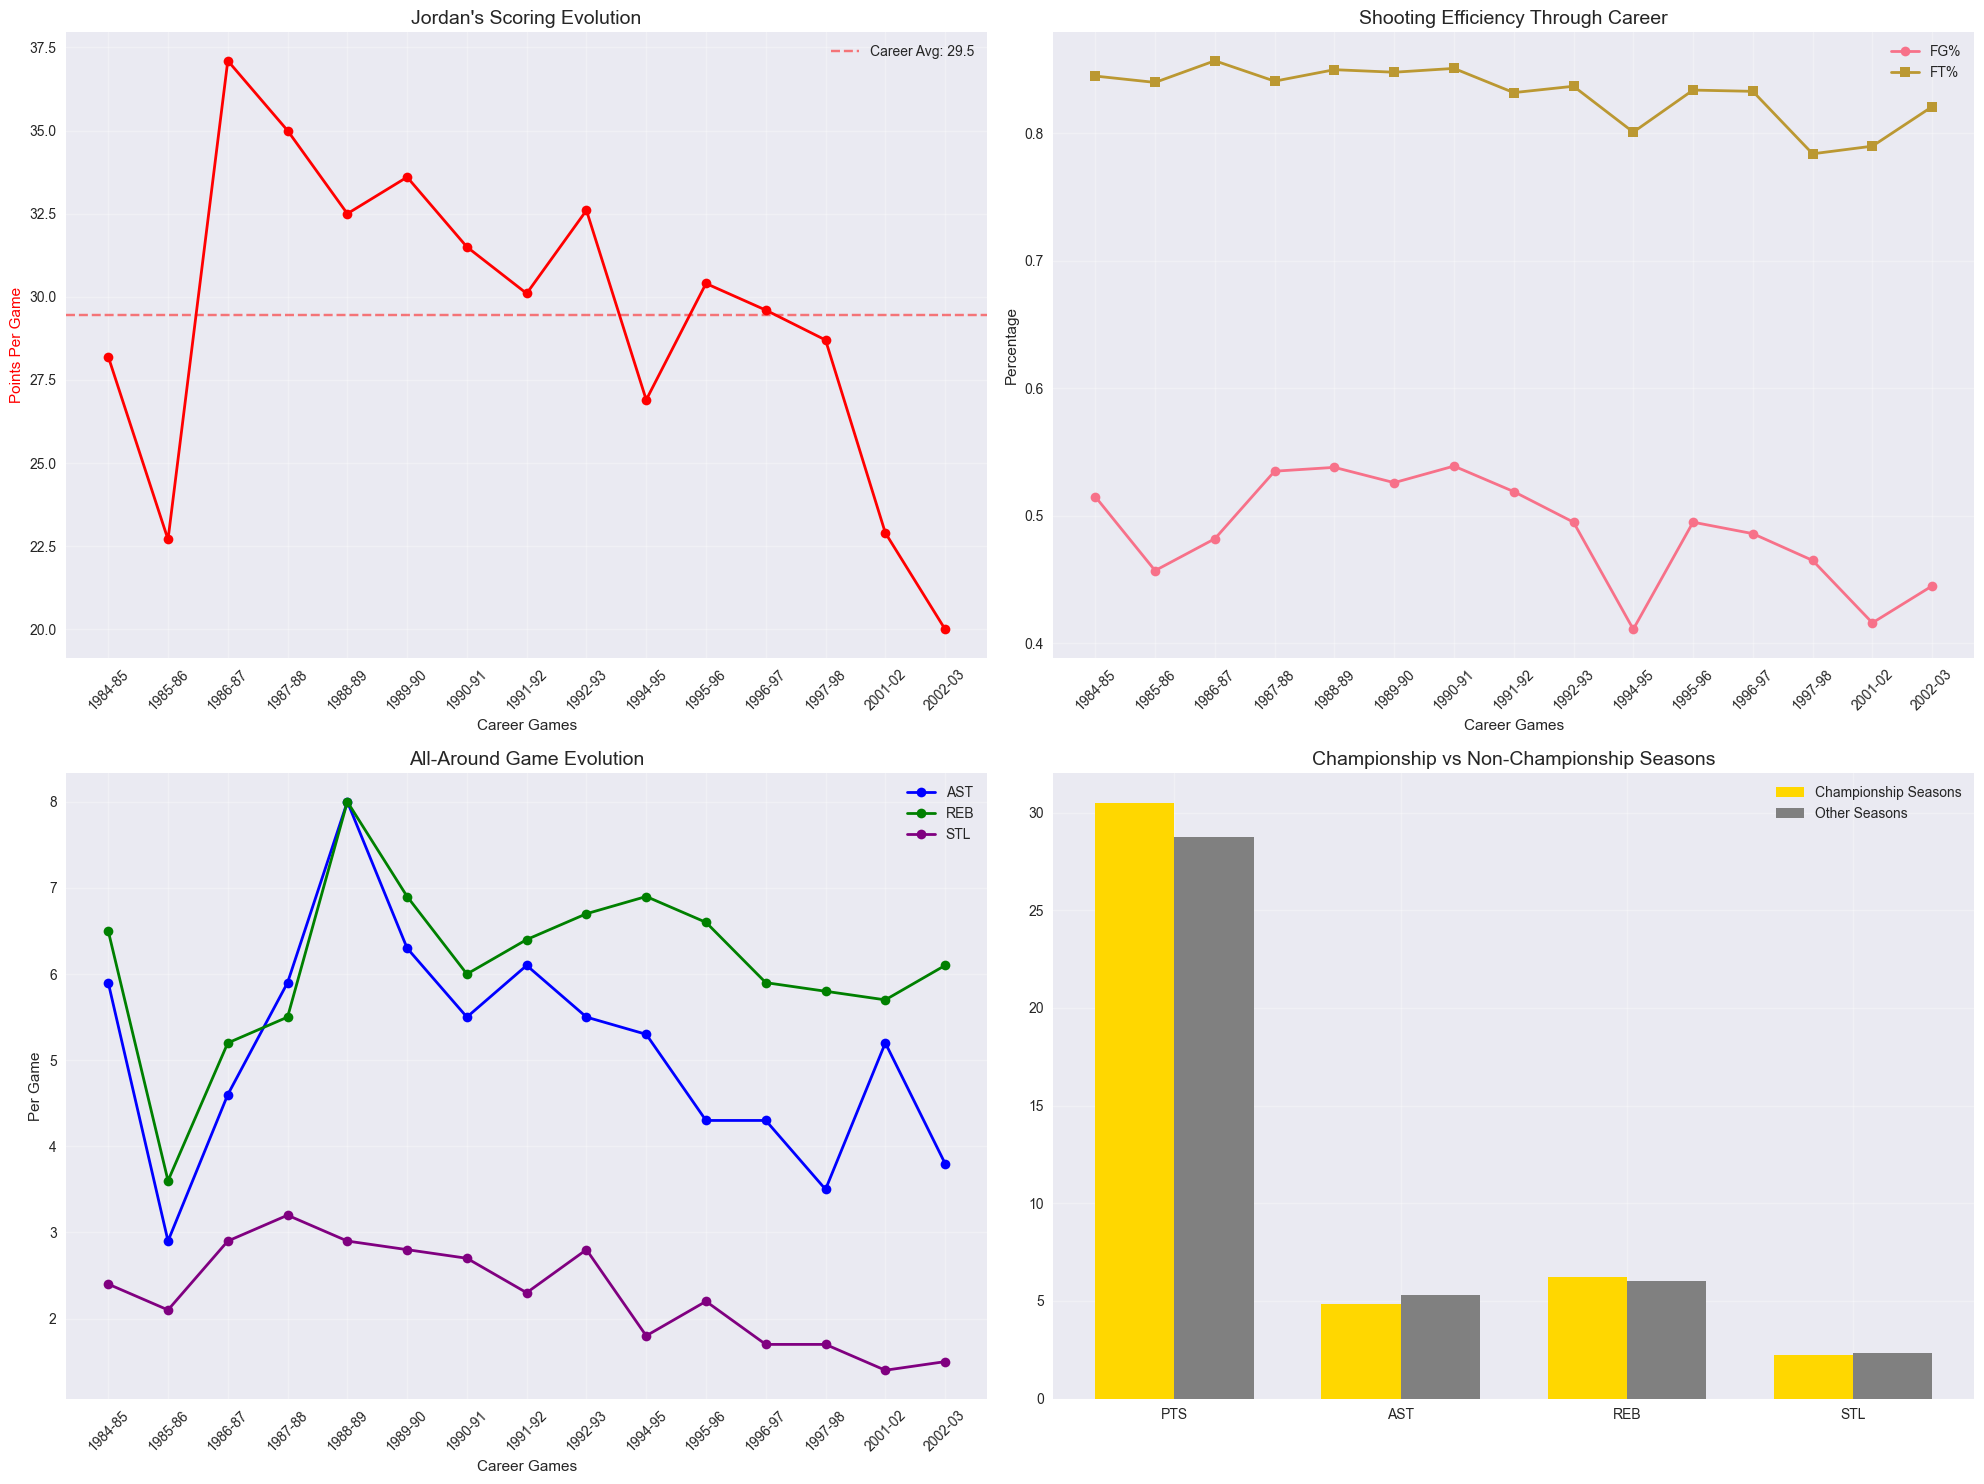

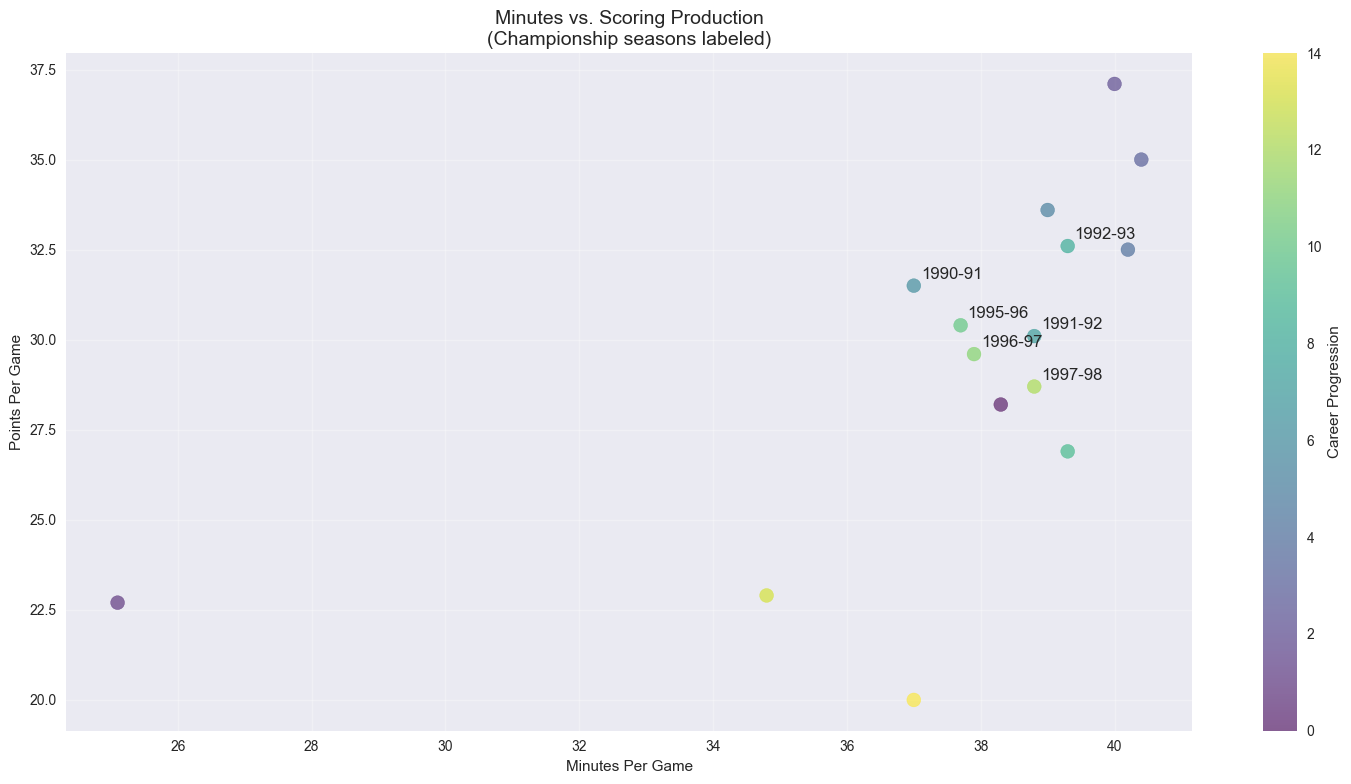

In [14]:
def visualize_jordan_legacy(stats):
    """
    Create comprehensive visualizations of Jordan's career achievements.
    
    Parameters:
    -----------
    stats : pandas.DataFrame
        Jordan's career statistics
    """
    # Create numeric columns for analysis
    numeric_stats = stats.copy()
    numeric_stats['FG_PCT'] = pd.to_numeric(numeric_stats['FG_PCT'], errors='coerce')
    numeric_stats['FT_PCT'] = pd.to_numeric(numeric_stats['FT_PCT'], errors='coerce')
    
    # Create figure with subplots
    fig = plt.figure(figsize=(20, 15))
    
    # 1. Career Scoring Progression
    ax1 = plt.subplot(2, 2, 1)
    ax1.plot(range(len(stats)), stats['PTS'], 
             marker='o', linewidth=2, color='red')
    ax1.set_title("Jordan's Scoring Evolution", fontsize=14)
    ax1.set_xlabel('Career Games')
    ax1.set_ylabel('Points Per Game', color='red')
    ax1.grid(True, alpha=0.3)
    
    # Add season labels at appropriate x-positions
    ax1.set_xticks(range(len(stats)))
    ax1.set_xticklabels(stats['SEASON_ID'], rotation=45)
    
    # Add career average line
    ax1.axhline(y=stats['PTS'].mean(), color='red', linestyle='--', 
                alpha=0.5, label=f'Career Avg: {stats["PTS"].mean():.1f}')
    ax1.legend()
    
    # 2. Shooting Efficiency Over Career
    ax2 = plt.subplot(2, 2, 2)
    ax2.plot(range(len(stats)), numeric_stats['FG_PCT'], 
             marker='o', label='FG%', linewidth=2)
    ax2.plot(range(len(stats)), numeric_stats['FT_PCT'], 
             marker='s', label='FT%', linewidth=2)
    ax2.set_title("Shooting Efficiency Through Career", fontsize=14)
    ax2.set_xlabel('Career Games')
    ax2.set_ylabel('Percentage')
    ax2.grid(True, alpha=0.3)
    ax2.legend()
    
    # Add season labels
    ax2.set_xticks(range(len(stats)))
    ax2.set_xticklabels(stats['SEASON_ID'], rotation=45)
    
    # 3. All-Around Game Metrics
    ax3 = plt.subplot(2, 2, 3)
    metrics = ['AST', 'REB', 'STL']
    colors = ['blue', 'green', 'purple']
    for metric, color in zip(metrics, colors):
        ax3.plot(range(len(stats)), stats[metric], 
                marker='o', label=metric, linewidth=2, color=color)
    ax3.set_title("All-Around Game Evolution", fontsize=14)
    ax3.set_xlabel('Career Games')
    ax3.set_ylabel('Per Game')
    ax3.grid(True, alpha=0.3)
    ax3.legend()
    
    # Add season labels
    ax3.set_xticks(range(len(stats)))
    ax3.set_xticklabels(stats['SEASON_ID'], rotation=45)
    
    # 4. Championship vs Regular Seasons Comparison
    ax4 = plt.subplot(2, 2, 4)
    
    # Define championship seasons
    championship_seasons = ['1990-91', '1991-92', '1992-93', 
                          '1995-96', '1996-97', '1997-98']
    
    # Calculate averages for championship and non-championship seasons
    champ_mask = stats['SEASON_ID'].isin(championship_seasons)
    champ_stats = stats[champ_mask][['PTS', 'AST', 'REB', 'STL']].mean()
    non_champ_stats = stats[~champ_mask][['PTS', 'AST', 'REB', 'STL']].mean()
    
    # Create bar plot
    metrics = ['PTS', 'AST', 'REB', 'STL']
    x = np.arange(len(metrics))
    width = 0.35
    
    ax4.bar(x - width/2, champ_stats, width, 
            label='Championship Seasons', color='gold')
    ax4.bar(x + width/2, non_champ_stats, width, 
            label='Other Seasons', color='gray')
    
    ax4.set_title("Championship vs Non-Championship Seasons", fontsize=14)
    ax4.set_xticks(x)
    ax4.set_xticklabels(metrics)
    ax4.legend()
    ax4.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Create additional visualization for efficiency
    plt.figure(figsize=(15, 8))
    
    # Minutes vs Points scatter plot
    scatter = plt.scatter(stats['MIN'], stats['PTS'], 
                         s=100, alpha=0.6, 
                         c=range(len(stats)), cmap='viridis')
    
    # Add labels for championship seasons
    for idx, row in stats[stats['SEASON_ID'].isin(championship_seasons)].iterrows():
        plt.annotate(row['SEASON_ID'], 
                    (row['MIN'], row['PTS']),
                    xytext=(5, 5), textcoords='offset points')
    
    plt.title("Minutes vs. Scoring Production\n(Championship seasons labeled)", 
              fontsize=14)
    plt.xlabel('Minutes Per Game')
    plt.ylabel('Points Per Game')
    plt.grid(True, alpha=0.3)
    plt.colorbar(scatter, label='Career Progression')
    
    plt.tight_layout()
    plt.show()

# Create the visualizations
visualize_jordan_legacy(jordan_stats)